<a href="https://colab.research.google.com/github/jomariy241/assignment/blob/main/ict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/cholesterol.csv")
data.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,564.000000


In [ ]:
data.nunique()

,0
age,41
sex,2
cp,4
trestbps,50
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40
slope,3


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0
slope,0


In [ ]:
data.isin(['?']).sum()

,0
age,0
sex,0
cp,0
trestbps,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0
slope,0


In [ ]:

data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64


In [ ]:
#Data Cleaning
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')
data['ca'].fillna(data['ca'].median(), inplace=True)
data['thal'].fillna(data['thal'].median(), inplace=True)

<ipython-input-10-c583eb9fa1af>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ca'].fillna(data['ca'].median(), inplace=True)
<ipython-input-10-c583eb9fa1af>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64


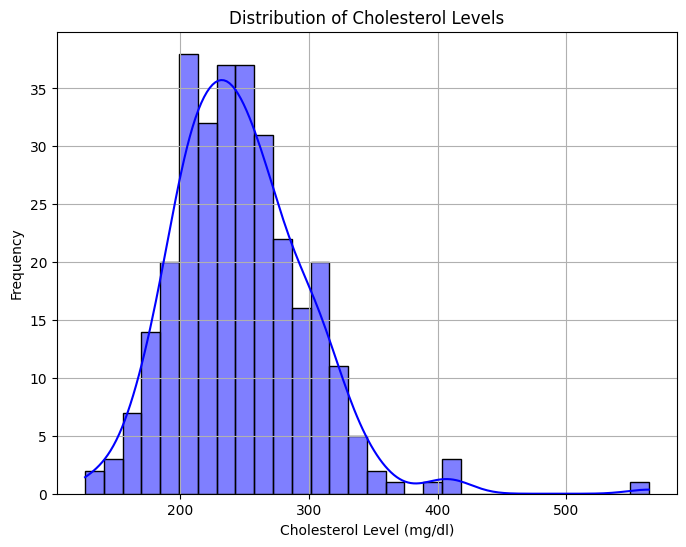

In [ ]:
# Cholesterol Levels
plt.figure(figsize=(8,6))
sns.histplot(data['chol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram shows the distribution of cholesterol levels. It reveals how the values cluster around certain ranges and how spread out they are. This helps to identify common cholesterol levels in the population and the presence of any skewness in the data.



<ipython-input-13-b5be9ec62048>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='chol', data=data, palette="coolwarm")


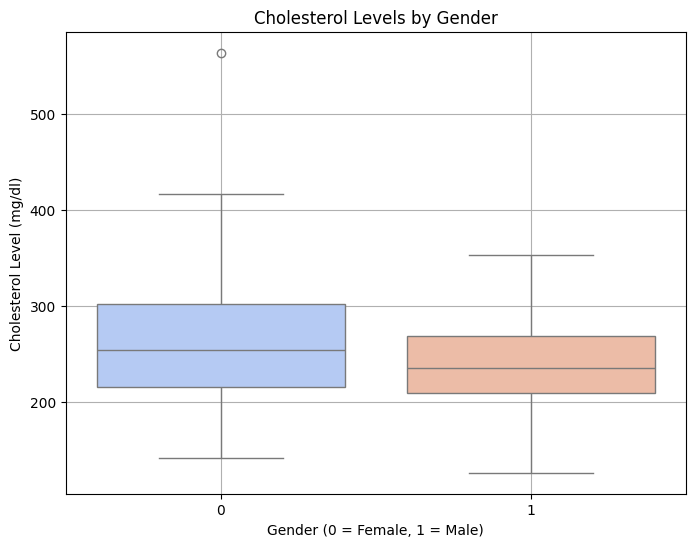

In [ ]:
# Cholesterol Levels by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='chol', data=data, palette="coolwarm")
plt.title('Cholesterol Levels by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.grid(True)
plt.show()


This plot compares cholesterol levels between males and females. It shows that the median cholesterol levels and the distribution (via the interquartile range) may differ between the two groups, with potential outliers visible for both genders.

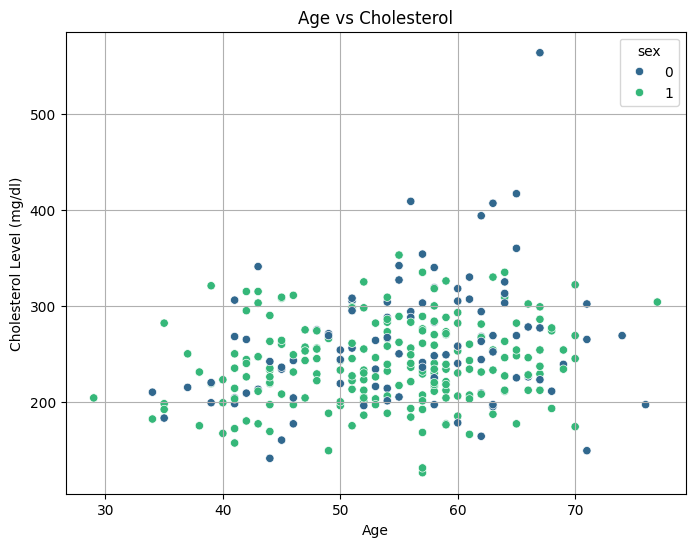

In [ ]:
# Age vs Cholesterol
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='chol', hue='sex', data=data, palette="viridis")
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.grid(True)
plt.show()

This plot illustrates how cholesterol levels vary across different ages, with color coding for gender. It provides insights into any visible trends, such as whether cholesterol tends to increase with age and whether this trend differs between men and women.

<ipython-input-25-74fa57016e6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=data, palette="Set2")


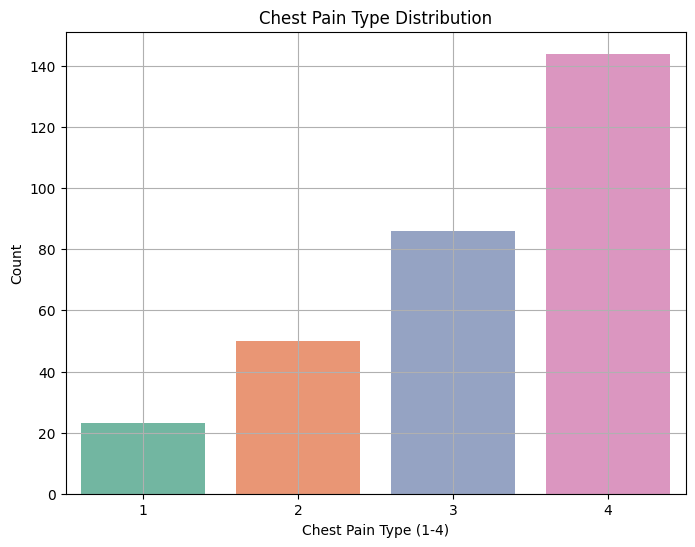

In [ ]:
# Chest Pain Type (cp)
plt.figure(figsize=(8,6))
sns.countplot(x='cp', data=data, palette="Set2")
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type (1-4)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This bar chart shows the distribution of chest pain types (cp) across the dataset. By examining the count of each type, we can get a sense of how frequently different types of chest pain occur, which can help in understanding its correlation with heart disease.

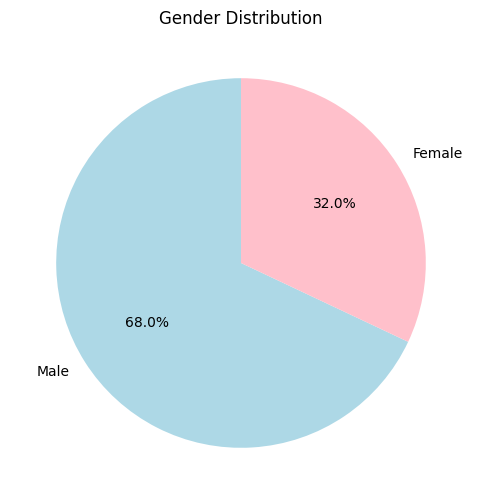

In [ ]:
# Gender Ratio
plt.figure(figsize=(8,6))
gender_counts = data['sex'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
plt.title('Gender Distribution')
plt.show()

The pie chart displays the proportion of males and females in the dataset. This helps understand the gender balance in the data, which may be relevant for analysis related to gender differences in cholesterol and heart disease.

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_names = data.columns
data = scaler.fit_transform(data)
# Restore the column names after scaling
data = pd.DataFrame(data, columns=column_names)

#Split the Data
from sklearn.model_selection import train_test_split
X = data.drop('chol', axis=1)
y = data['chol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Build the Model
#model 1:RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.3741694371620297
R-squared: 0.09271435727814548


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 1.3741694371620297
Root Mean Squared Error (RMSE): 1.1722497332744546
Mean Absolute Error (MAE): 0.8127583638694277
R-squared: 0.09271435727814548


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Import RandomForestRegressor instead of RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomForestRegressor in GridSearchCV
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=rf_param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
print(f"Best Random Forest Hyperparameters: {rf_grid_search.best_params_}")

# Evaluate Random Forest model - Use regression metrics
rf_predictions = rf_best_model.predict(X_test)
print("Random Forest Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_predictions)}")
print(f"R-squared: {r2_score(y_test, rf_predictions)}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Random Forest Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Model Evaluation:
Mean Squared Error: 1.381843007807532
R-squared: 0.08764793658299852


In [ ]:
#model 2 : GradientBoostingRegressor model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)  # Initialize gbr

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator
best_model = grid_search.best_estimator_

# Predict using the best GradientBoostingRegressor model
gbr_predictions = best_model.predict(X_test)

# Evaluate the GradientBoostingRegressor model
print("Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, gbr_predictions)}")
print(f"R-squared: {r2_score(y_test, gbr_predictions)}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Regressor Model Evaluation:
Mean Squared Error: 1.4290354238261846
R-squared: 0.0564894779961832


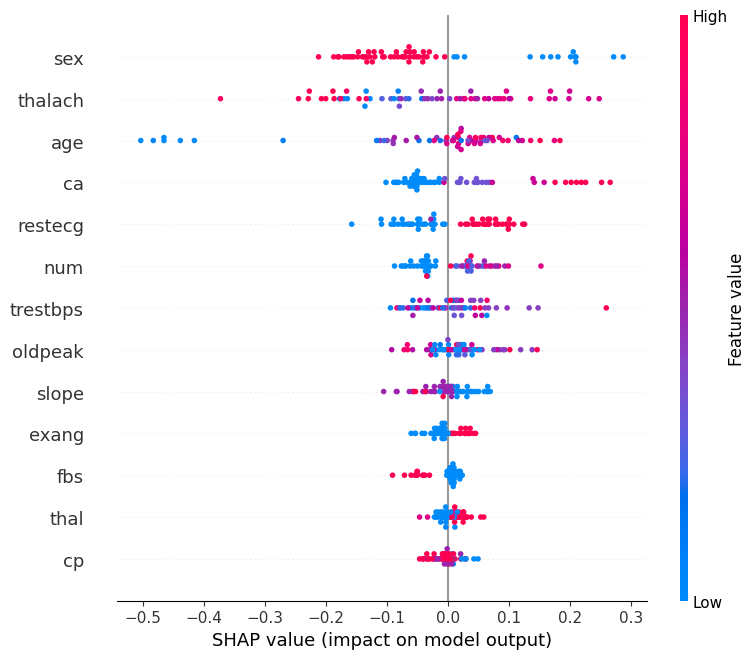

In [ ]:
# SHAP Explanation
!pip install shap
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [ ]:
df=pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.nunique()

,0
male,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


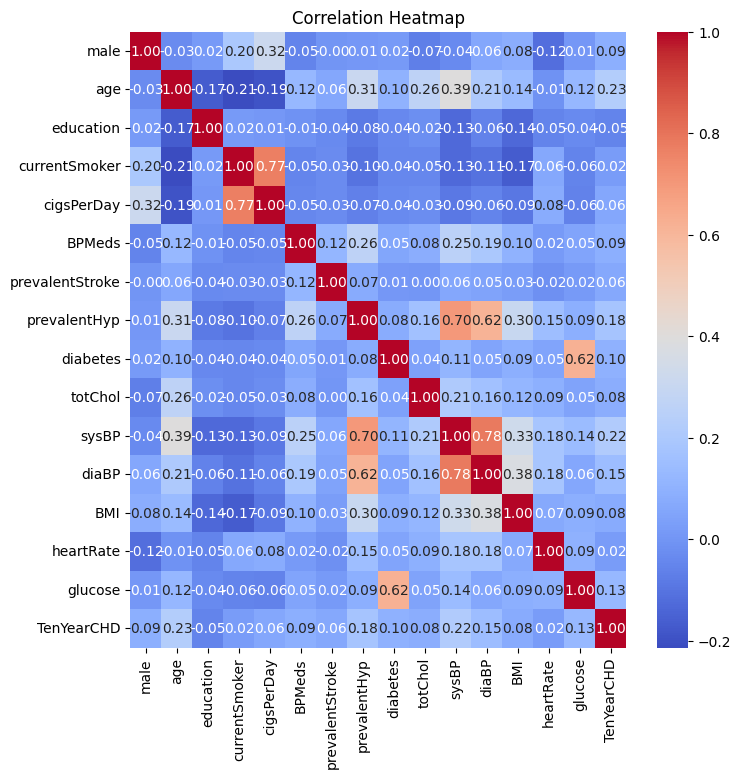

In [ ]:
#correlation metrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Dropping irrelevant columns for cholesterol prediction
df.drop(['education','TenYearCHD','prevalentStroke'], axis=1, inplace=True)


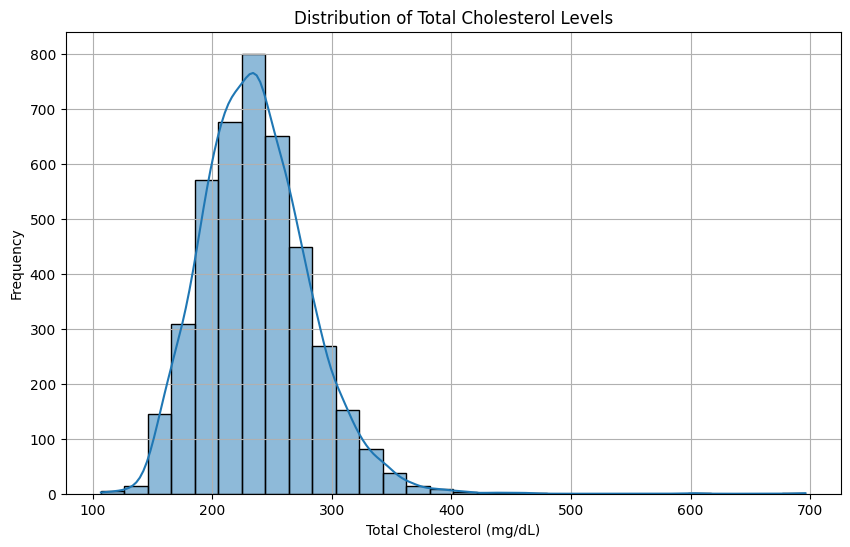

In [ ]:
# Visualize the distribution of cholesterol levels
plt.figure(figsize=(10, 6))
sns.histplot(df['totChol'], bins=30, kde=True)
plt.title('Distribution of Total Cholesterol Levels')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


The histogram illustrates that total cholesterol levels are mostly distributed around a certain range, with potential skewness indicating variability and the presence of extreme values.

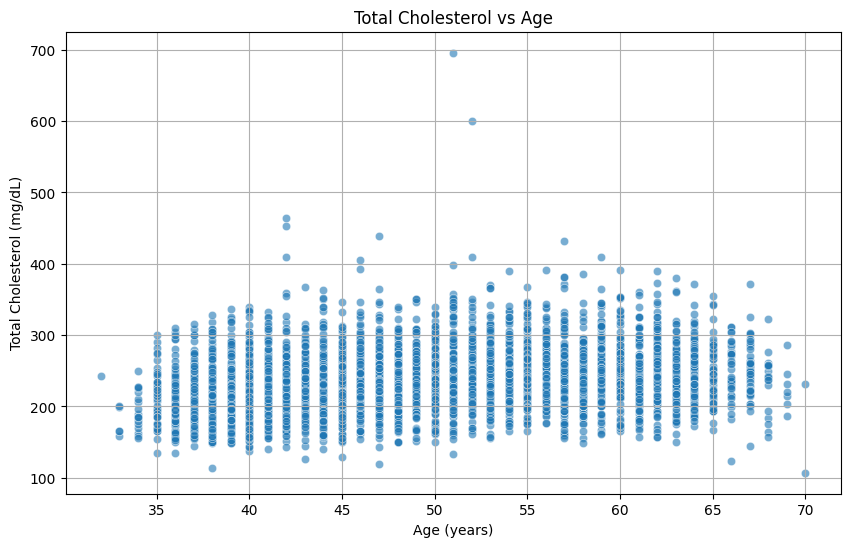

In [ ]:
# Scatter plot of cholesterol vs age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='totChol', alpha=0.6)
plt.title('Total Cholesterol vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Total Cholesterol (mg/dL)')
plt.grid()
plt.show()


The scatter plot suggests that cholesterol levels tend to increase with age, indicating a possible positive correlation.




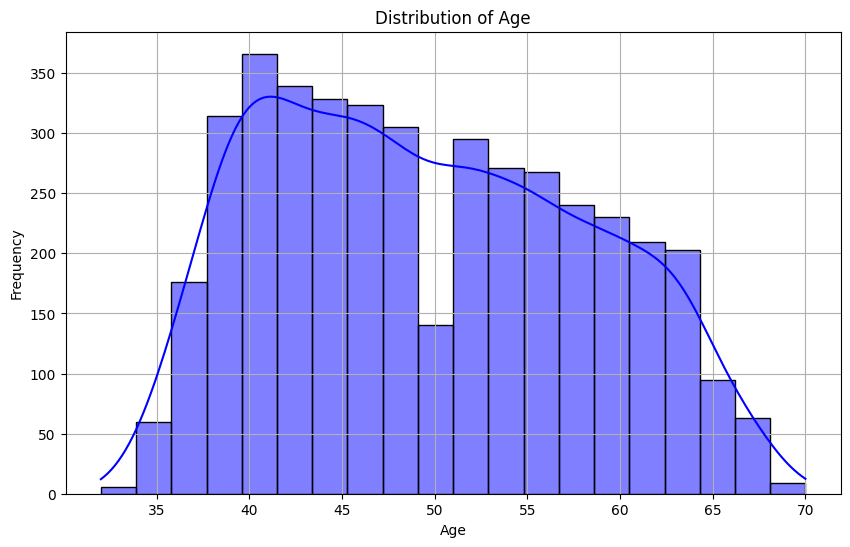

In [ ]:
#Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


The age distribution may show a peak in older individuals, indicating their prevalence in the study.

In [ ]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0
diaBP,0


Column 'cigsPerDay' has 29 null values.


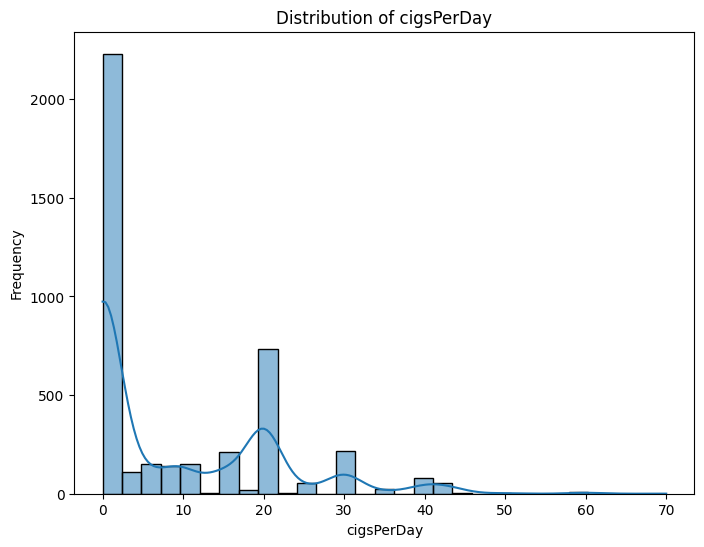

Column 'BPMeds' has 53 null values.


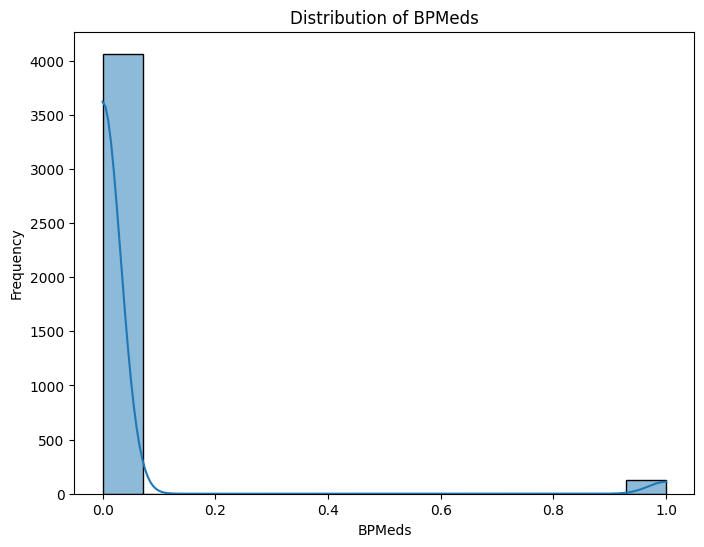

Column 'totChol' has 50 null values.


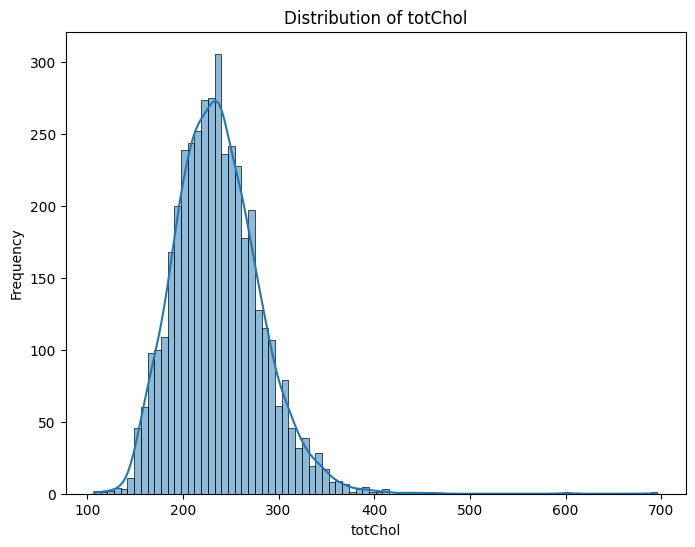

Column 'BMI' has 19 null values.


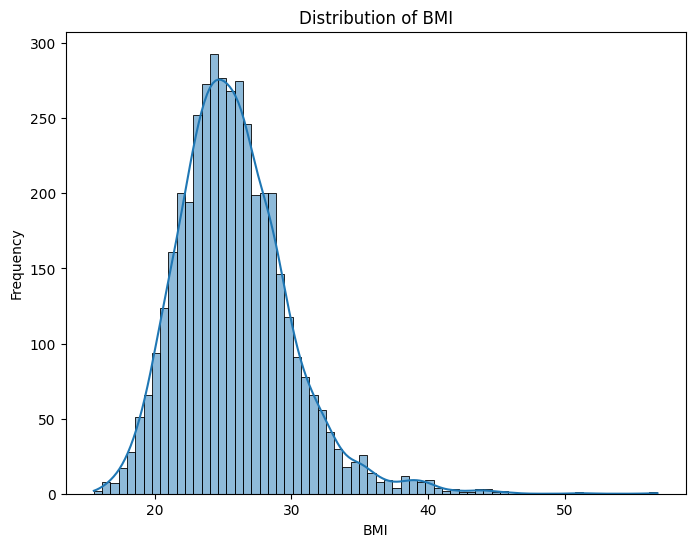

Column 'heartRate' has 1 null values.


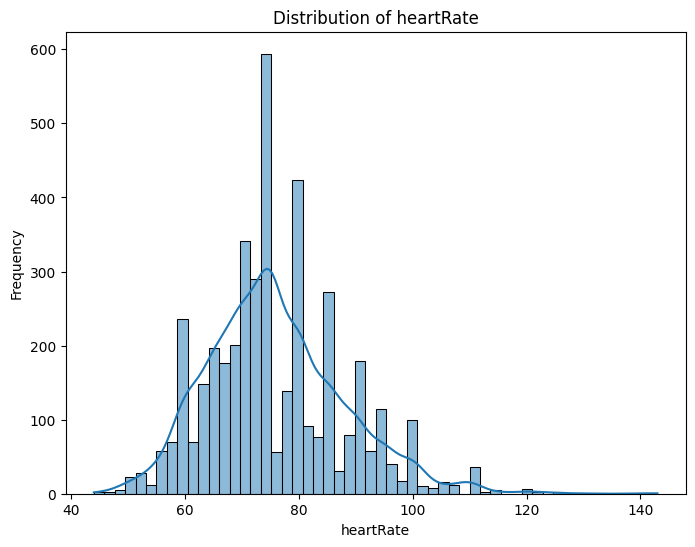

Column 'glucose' has 388 null values.


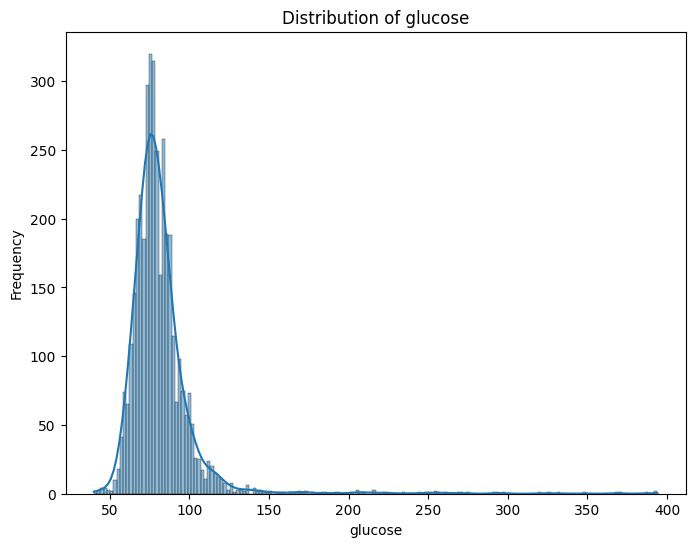

In [ ]:
#histogram for null values
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"Column '{col}' has {null_count} null values.")
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
# Handle missing values
from sklearn.impute import SimpleImputer
data_clean = df.copy()
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_clean), columns=data_clean.columns)

In [ ]:
data_imputed.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0
diaBP,0


In [ ]:
# Enhanced Feature Engineering
# 1. Polynomial Features (degree 2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_imputed.drop(columns=['totChol']))

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(input_features=data_imputed.drop(columns=['totChol']).columns)
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)


In [ ]:
#  Log transformation (for skewed features like cholesterol)
data_imputed['log_totChol'] = np.log1p(data_imputed['totChol'])  # Apply log1p to avoid log(0)


In [ ]:
# Creating new combined features
data_imputed['BP_ratio'] = data_imputed['sysBP'] / data_imputed['diaBP']


In [ ]:
# Interaction terms
data_imputed['sysBP_totChol_interaction'] = data_imputed['sysBP'] * data_imputed['totChol']
data_imputed['diaBP_totChol_interaction'] = data_imputed['diaBP'] * data_imputed['totChol']


In [ ]:
# Split the data into training and testing sets
# Defining features (X) and target (y)
X = data_imputed.drop(columns=['totChol', 'log_totChol'])
y = data_imputed['log_totChol']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create the interaction features
X_train['BMI_Age'] = X_train['BMI'] * X_train['age']
X_test['BMI_Age'] = X_test['BMI'] * X_test['age']


In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the processed data
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3392, 15)
X_test shape: (848, 15)
y_train shape: (3392,)
y_test shape: (848,)


In [ ]:
#Build the Model
#model 1:RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00045269763808658336
R-squared: 0.9876969423529297


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.00045269763808658336
Root Mean Squared Error (RMSE): 0.02127669236715574
Mean Absolute Error (MAE): 0.007594063981403825
R-squared: 0.9876969423529297


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Import RandomForestRegressor instead of RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomForestRegressor in GridSearchCV
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=rf_param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
print(f"Best Random Forest Hyperparameters: {rf_grid_search.best_params_}")

# Evaluate Random Forest model - Use regression metrics
rf_predictions = rf_best_model.predict(X_test)
print("Random Forest Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_predictions)}")
print(f"R-squared: {r2_score(y_test, rf_predictions)}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Random Forest Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Model Evaluation:
Mean Squared Error: 0.0004847183521989093
R-squared: 0.9868267087610572


In [ ]:
#model 2 : GradientBoostingRegressor model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)  # Initialize gbr

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator
best_model = grid_search.best_estimator_

# Predict using the best GradientBoostingRegressor model
gbr_predictions = best_model.predict(X_test)

# Evaluate the GradientBoostingRegressor model
print("Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, gbr_predictions)}")
print(f"R-squared: {r2_score(y_test, gbr_predictions)}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Gradient Boosting Regressor Model Evaluation:
Mean Squared Error: 0.0001632518506595929
R-squared: 0.9955632705791326


In [ ]:
# Fit and predict for chol target
model_chol = RandomForestRegressor(random_state=42)  # Or your preferred model
model_chol.fit(X_train, y_train)  # Assuming you have X_train_chol, y_train_chol
y_pred_chol = model_chol.predict(X_test)  # Assuming you have X_test_chol

# Fit and predict for fram target (similarly)
model_fram = RandomForestRegressor(random_state=42)
model_fram.fit(X_train, y_train)
y_pred_fram = model_fram.predict(X_test)

# Combine predictions for Bagging
combined_X_test = pd.DataFrame({
    'chol_pred': y_pred_chol,
    'fram_pred': y_pred_fram
})

# Instead of concatenating y_test with itself, just use y_test
y_combined = y_test.values

# Train a Bagging Regressor on combined predictions
from sklearn.ensemble import BaggingRegressor
# Replace 'base_estimator' with 'estimator'
bagging_model = BaggingRegressor(estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(combined_X_test, y_combined)

# Make predictions with the Bagging model
y_pred_bagging = bagging_model.predict(combined_X_test)

# Evaluate the Bagging model
bagging_mse = mean_squared_error(y_combined, y_pred_bagging)
bagging_r2 = r2_score(y_combined, y_pred_bagging)
bagging_mae = mean_absolute_error(y_combined, y_pred_bagging)

print("Bagging Random Forest Model Evaluation:")
print(f"Mean Squared Error: {bagging_mse}")
print(f"R-squared: {bagging_r2}")
print(f"Mean Absolute Error: {bagging_mae}")

Bagging Random Forest Model Evaluation:
Mean Squared Error: 0.0002310546602272957
R-squared: 0.993720579554124
Mean Absolute Error: 0.005657702146345362
